# Estimate the longest expected win streak in a baseball season
The Washington Nationals baseball team is on a [10-game winning streak](http://m.mlb.com/news/article/90786822/10-game-winning-streak-ties-nats-record), tying the team record.  It made me wonder, how rare is it to see a streak like this one, given the team's expected skill-level up-to-this point?

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
rng = np.random.RandomState(seed=1337)

In [3]:
def simulate_season(win_pct):
    """Simple simulation to capture the longest observed win streak.
    
    Assumes a team's win percentage is simply the liklihood of winning a game
    and that all games are independent.
    
    Parameters
    ----------
    win_pct : double
        Win percentage of the team to be estimated.
    
    Returns
    -------
    longest : int
        Longest win streak observed during the season.
    """
    ngames = 162
    longest, streak = 0, 0

    for _ in xrange(ngames):
        if rng.binomial(1, win_pct):
            streak += 1
        else:
            if streak > longest:
                longest = streak
            streak = 0
    return longest  

In [4]:
def longest_win_streak_simulation(win_pct, iterations):
    """Mutlitple simulations of 162 games season looking for longest win streak.
    
    Parameters
    ----------
    win_pct : double
        Win percentage of the team to be estimated.
    iterations : int
        Number of iterations to execute for the simulation.
        
    Returns
    -------
    simulation_result : np.array
        Array of the containing the results of the longest win stream for the number of iterated seasons.
    """
    simulation_result = np.zeros(iterations)

    for i in xrange(iterations):
        simulation_result[i] = simulate_season(win_pct)
    
    return simulation_result

The Nats are a good team (begining the streak at 62-51 and with a four-game lead in the NL East).  Making me believe that going on a run like this is still unlikely although far from rare.

In [5]:
iterations = 20000
wins, losses = 62, 51
win_pct = wins / (wins + losses)
res = longest_win_streak_simulation(win_pct, iterations)

In [6]:
print("Expected longest streak for a team of this quality: {0:.2f}".format(res.mean()))
print("Standard deviation of observed longest streaks:     {0:.4f}".format(res.std()))
print("Probability of witnessing streak >= 10 games:       {0}".format(res[res >= 10].size / iterations))

Expected longest streak for a team of this quality: 7.61
Standard deviation of observed longest streaks:     2.0869
Probability of witnessing streak >= 10 games:       0.1579


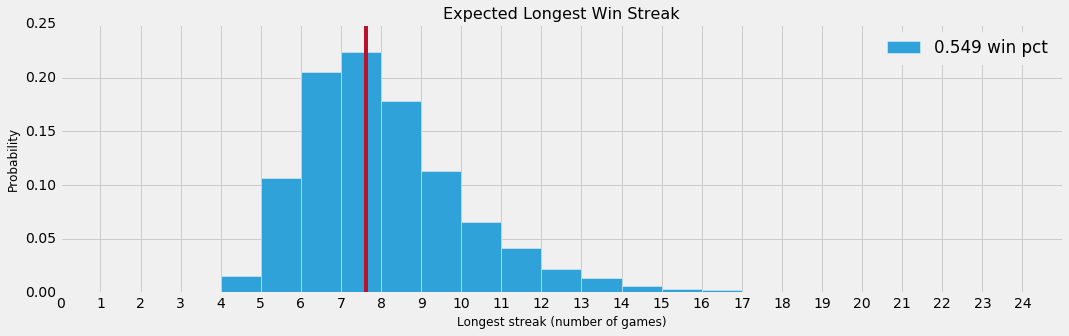

In [7]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16, 4.5))
    plt.title('Expected Longest Win Streak', size=16)
    plt.xlabel('Longest streak (number of games)', size=12)
    plt.ylabel('Probability', size=12)
    plt.hist(res, bins=np.arange(0, 25, 1), label='{:.3f} win pct'.format(win_pct), normed=True)
    plt.vlines(res.mean(), 0, 6000, colors='#BA122B')
    plt.ylim(0, 0.25)

    plt.xticks(np.arange(0, 25, 1))
    plt.legend()
    plt.show()

In [8]:
pcts = np.arange(0.40, 0.60, 0.02)
results = [longest_win_streak_simulation(pct, 20000).mean() for pct in pcts]

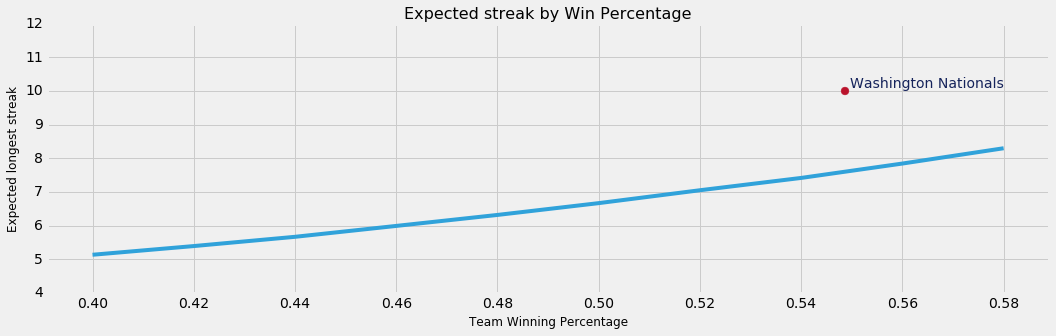

In [9]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16, 4.5))
    plt.plot(pcts, results)
    plt.title('Expected streak by Win Percentage', size=16)
    plt.xlabel('Team Winning Percentage', size=12)
    plt.ylabel('Expected longest streak', size=12)
    plt.xticks(pcts)
    plt.ylim(4.0, 12.0)
    
    plt.scatter(x=win_pct, y=10, color='#BA122B', s=60)
    plt.annotate('Washington Nationals', (win_pct + 0.001, 10 + 0.1), color='#14225A')
    
    plt.show()